In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy as cp
from random import randint
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# define Euclidean distance
# X  for data C for center
def dist(X,C):
    return np.linalg.norm(X-C,axis =1)


#this is a function to compute and return new center and clusters
def k_mean(center,data,k):
    #convert to numpy type
    center = np.array(center)
    
    # initial cluster size is data size
    labels = np.zeros(len(data))
    
    # to store the value of center when it updates
    center_old = np.zeros(center.shape)
    #compute error
    err = dist(center,center_old)
   
    d = np.zeros(k)
    while any(err != 0):
        for i in range(len(data)):
            #assigning points by computing distance
            #for j in range (k):
            d = dist(data[i],center)
            #forming clusters by labelling
            labels[i] = np.argmin(d)
       
        
        #store the old center value
        center_old = cp.deepcopy(center)
        
        #updating the center by computing average
        for i in range(k):
            #forming cluters
            points= [data[j] for j in range(len(data)) if labels[j] == i ]
            #compute average 
            if points:
                center[i] = sum(points)/len(points)
           
        err = dist(center[:],center_old[:])
    return labels,center
    

#ploting function of clusters and its own centers
def plot_clusters(labels,k,center):
    #ploting  different color clusters
    fig,ax = plt.subplots()
    color = ['yellow','blue','green','red']
    center = np.array(center)
    for i in range(k):
        points= [data[j] for j in range(len(data)) if labels[j] == i ]
        x = [ points[i][0] for i in range(len(points))]
        y = [ points[i][1] for i in range(len(points))]
        ax.scatter(x,y,c = color[i])
        ax.scatter(center[:,0],center[:,1],marker = '*', c='black')

        
# this is the function for computing the lost function respect to 3rd method for k = 1-10
def K_MEAN(n,data):
    K = np.arange(1,n+1)
    #storing the cost
    cost =[]
    for j in K:
        cs= []
        index = np.zeros(j, dtype='int')
        index[0] = np.random.randint(0, len(data)-1, dtype='int')
        cs.append(data[index[0],])
        d = 0
        for i in np.arange(j - 1):
            d = np.add(np.linalg.norm(data - data[index[i],], axis=1), d)
            index[i + 1] = np.argmax(d)
            cs.append(data[index[i + 1]])
        labels,centers = k_mean(cs,data,j)
        #this is for getting the sum of error respect to each clusters on its own centers
        s = 0
        for i in range(j):
            points = [data[z] for z in range (len(data)) if labels[z] == i]
            s = s+sum(dist(points,centers[i]))
        cost.append(s)
    return cost,labels,centers


#this is the function for ploting cost respect to k
def plt_cost(k,cost):
    K = np.arange(1,k+1)
    plt.plot(K,cost)
    plt.title('Cost respect to k')
    plt.xlabel('K = 1- 10')
    plt.xlim([min(K), max(K)])
    plt.ylabel('Cost')

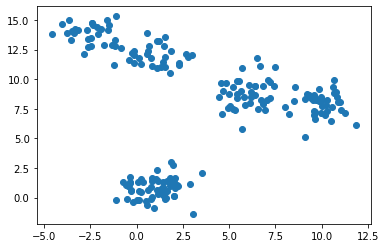

In [3]:
#load and plot cluster
data = np.loadtxt("twopoints.txt",delimiter = ",")
x,y = data[:,0],data[:,1]
plt.scatter(x,y)

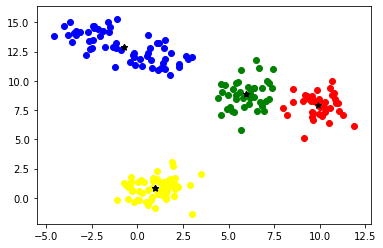

In [4]:
#part b)
#MANUAL set center as K =4
k = 4
c = [[1.25,1.25],[-0.5,13.75],[6.25,10],[10,7.5]]
labels,centers = k_mean(c,data,k)
plot_clusters(labels,k,centers)

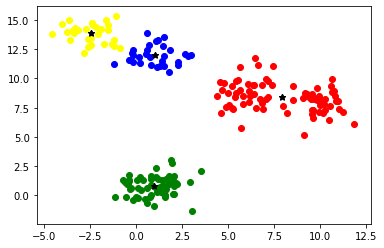

In [5]:
k = 4
c = [[-2.5,13],[1.25,12.5],[1.25,2],[8,8]]
clusters,centers = k_mean(c,data,k)
plot_clusters(clusters,k,centers)

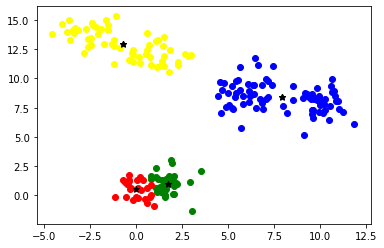

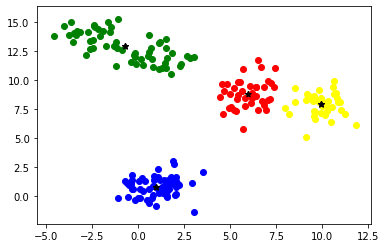

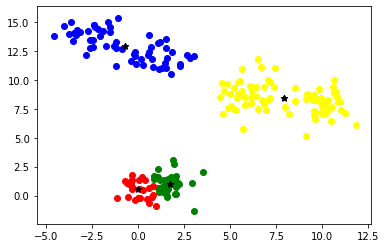

In [6]:
# part c)
# assuming k = 4 for 2nd  initialization
k = 4
#ploting three different graphs with uniform random pick points from datasets
for j in range (3):
    # c for store the center
    c= []
    for i in range (k):
        c.append(data[randint(0,199)])
    clusters,centers = k_mean(c,data,k)
    plot_clusters(clusters,k,centers)

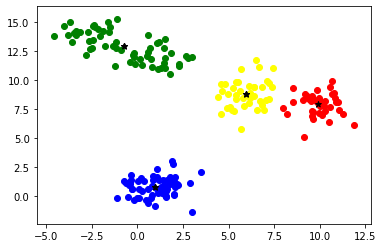

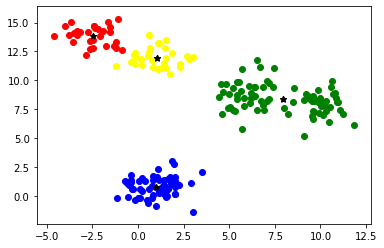

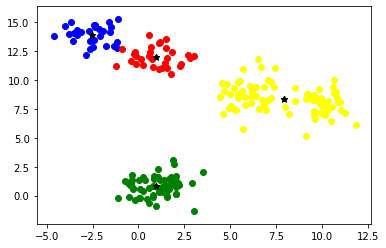

In [7]:
k = 4
for _ in range(k-1):
    cs= []
    index = np.zeros(k, dtype='int')
    index[0] = np.random.randint(0, len(data)-1, dtype='int')
    cs.append(data[index[0],])
    d = 0
    for i in np.arange(k - 1):
        d = np.add(np.linalg.norm(data - data[index[i],], axis=1), d)
        index[i + 1] = np.argmax(d)
        cs.append(data[index[i + 1]])
    clusters,centers = k_mean(cs,data,k)
    plot_clusters(clusters,k,centers)

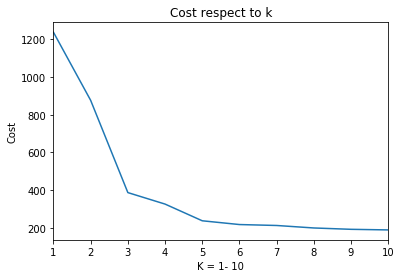

In [8]:
# part d)
k = 10
cost,labels,centers = K_MEAN(k,data)
plt_cost(k,cost)

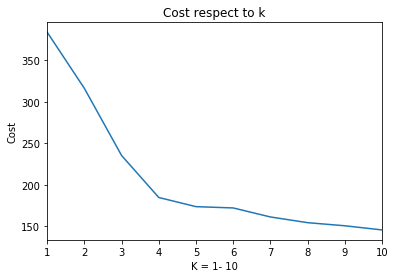

In [9]:
# part e)
#load 3 points data and plot its own lost function
data1 = np.loadtxt("threepoints.txt",delimiter = ",")
k = 10
cost1,labels1,centers1 = K_MEAN(k,data1)
plt_cost(k,cost1)

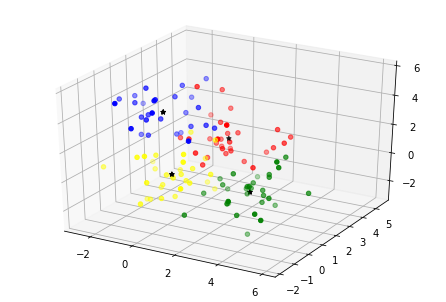

In [10]:
# 3D plot for threepoints by observed above plot 4 is the suitable cluster
#3d plots
K1 = 4
cos2t,labels2,centers2 = K_MEAN(K1,data1)
fig = plt.figure()
ax = Axes3D(fig)
color = ['yellow','blue','green','red']

for i in range(K1):
    points= [data1[j] for j in range(len(data1)) if labels2[j] == i ]
    x = [ points[i][0] for i in range(len(points))]
    y = [ points[i][1] for i in range(len(points))]
    z = [ points[i][2] for i in range(len(points))]
    ax.scatter(x,y,z,c = color[i])
    ax.scatter(centers2[:,0],centers2[:,1],centers2[:,2],marker = '*', c='black')



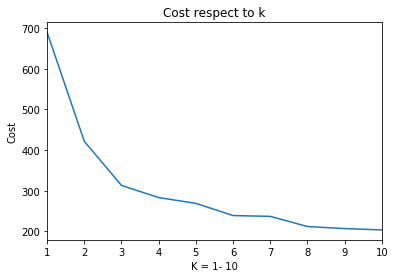

In [11]:
# part f)
data2 = np.loadtxt('seeds_dataset.txt')
#removing the last column
d2 = data2[:,0:data2.shape[1]-1]
# ploting cost respect to k as k = 1- 10
k2 = 10
co2,cl2,cen2 = K_MEAN(k,d2)
plt_cost(k2,co2)

In [12]:
#extract the last column for computing empirical loss
right_labels = data2[:,-1]
k3 = 3
cost3,labels3,centers3 = K_MEAN(k3,d2)
#counting the right one
count = 0
for i in range(len(right_labels)):
    if labels3[i]+1 == right_labels[i]:
        count +=1
#printout the difference between right labels and estimate labels
print(len(right_labels)-count)


22
